In [2]:
import os
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import tensorflow as tf

# 读取数据，构造训练集和测试集

In [2]:
def load_data():
    # 读取数据
    x = np.load('train_data/train_data.npy')
    y = np.load('train_data/label.npy')
    num = len(Counter(y))
    print("类别数量为：", num)
    return x, y, num

In [3]:
def create_train_data(x, y, ratio=0.8):
    """
    x:数据
    y:类别
    ratio:生成训练集比率
    """
    # 打乱顺序
    # 读取data矩阵的第一维数（图片的个数）
    num_example = x.shape[0]
    # 产生一个num_example范围，步长为1的序列
    arr = np.arange(num_example)
    # 调用函数，打乱顺序
    np.random.seed(99)
    np.random.shuffle(arr)
    # 按照打乱的顺序，重新排序
    arr_data = x[arr]
    arr_label = y[arr]
    # 将数据集分为训练集80%、测试集20%
    s = int(num_example * ratio)
    x_train = arr_data[:s]
    y_train = arr_label[:s]
    x_val = arr_data[s:]
    y_val = arr_label[s:]
    print("训练集shape", x_train.shape)
    print("训练集类别：", Counter(y_train))
    print("测试集shape", x_val.shape)
    print("测试集类别：", Counter(y_val))
    return x_train, y_train, x_val, y_val

In [4]:
# 读取数据
data, label, label_count = load_data()
# 生成训练集测试集,70%用作训练，30%用作测试
train_data, train_label, val_data, val_label = create_train_data(data, label, 0.7)
print("*"*10)
print("训练集数量：",len(train_label))
print("测试集数量：",len(val_label))

类别数量为： 4
训练集shape (3919, 1000, 2)
训练集类别： Counter({0: 989, 2: 987, 3: 979, 1: 964})
测试集shape (1681, 1000, 2)
测试集类别： Counter({1: 436, 3: 421, 2: 413, 0: 411})
**********
训练集数量： 3919
测试集数量： 1681


# 数据集构建

In [5]:
# 使用机器学习算法需要对多维数据进行降维
m_train = train_data.reshape(train_data.shape[0],train_data.shape[1]*train_data.shape[2])
m_val = val_data.reshape(val_data.shape[0],val_data.shape[1]*val_data.shape[2])

# 设置训练迭代次数
epoch = 20

# 随机森林

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score,classification_report,accuracy_score,log_loss
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn import model_selection
from sklearn.preprocessing import  OneHotEncoder

## 模型训练

In [7]:
# 模型参数设置
rfc = RandomForestClassifier(n_estimators = 50,min_samples_split = 5,min_samples_leaf = 4,max_depth = 5)

# 模型准确率和损失值
acc_list = []
loss_list = []
train_acc_list = []
print("开始训练")
for i in range(1,epoch +1):

    # 模型训练
    rfc.fit(m_train,train_label)

    # # 训练集
    # y_train = rfc.predict(m_train)

    # 测试集
    y_pred = np.asarray(rfc.predict(m_val),dtype = 'int64')

    # 计算准确率
    acc = round(accuracy_score(val_label, y_pred),3)
    
    # 训练集
    y_pred = np.asarray(rfc.predict(m_train),dtype = 'int64')
    # 计算准确率
    train_acc = round(accuracy_score(train_label, y_pred),3)
    
    # print('测试集准确率:', round(accuracy_score(val_label, y_pred),3))
    acc_list.append(acc)
    train_acc_list.append(train_acc)
    
    # 计算损失值
    # 使用one-hot编码计算损失值
    noe_hot = OneHotEncoder(sparse = False)

    y_pred_o = noe_hot.fit_transform(y_pred.reshape(1, -1))
    val_label_o = noe_hot.fit_transform(val_label.reshape(1, -1))
#     loss = round(log_loss(val_label_o,y_pred_o),3)
    # print("loss：",round(log_loss(val_label,y_pred),3))
#     loss_list.append(loss)
    print("完成第",i,"轮训练，测试集准确率：",acc)

开始训练
完成第 1 轮训练，测试集准确率： 0.741
完成第 2 轮训练，测试集准确率： 0.739
完成第 3 轮训练，测试集准确率： 0.72
完成第 4 轮训练，测试集准确率： 0.736
完成第 5 轮训练，测试集准确率： 0.746
完成第 6 轮训练，测试集准确率： 0.729
完成第 7 轮训练，测试集准确率： 0.723
完成第 8 轮训练，测试集准确率： 0.742
完成第 9 轮训练，测试集准确率： 0.745
完成第 10 轮训练，测试集准确率： 0.736
完成第 11 轮训练，测试集准确率： 0.714
完成第 12 轮训练，测试集准确率： 0.725
完成第 13 轮训练，测试集准确率： 0.735
完成第 14 轮训练，测试集准确率： 0.732
完成第 15 轮训练，测试集准确率： 0.726
完成第 16 轮训练，测试集准确率： 0.75
完成第 17 轮训练，测试集准确率： 0.723
完成第 18 轮训练，测试集准确率： 0.736
完成第 19 轮训练，测试集准确率： 0.72
完成第 20 轮训练，测试集准确率： 0.719


## 测试集得分

In [8]:
y_pred = np.asarray(rfc.predict(m_val),dtype = 'int64')
print('------------------测试集上得分：------------------------')
print('*' * 5)
print('测试集准确率得分:', round(accuracy_score(val_label, y_pred),3))
print('*' * 5)
print('准确率、召回率、f1-值测试报告如下:\n', classification_report(val_label, y_pred))

------------------测试集上得分：------------------------
*****
测试集准确率得分: 0.719
*****
准确率、召回率、f1-值测试报告如下:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90       411
           1       0.71      0.76      0.73       436
           2       0.52      0.36      0.43       413
           3       0.75      0.75      0.75       421

    accuracy                           0.72      1681
   macro avg       0.70      0.72      0.70      1681
weighted avg       0.70      0.72      0.70      1681



## 模型迭代准确率

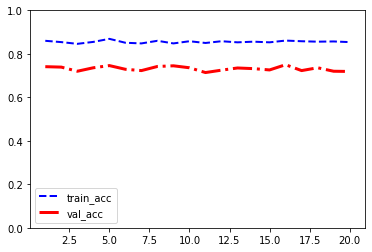

In [9]:
# 设置Y轴范围
plt.ylim(0,1)
# 训练准确率曲线
show_data1 = train_acc_list
# 测试准确率曲线
show_data2 = acc_list
x_data = list(range(1,len(show_data1)+1))
ln1, = plt.plot(x_data,show_data1,color='blue',linewidth=2.0,linestyle='--')
ln2, = plt.plot(x_data,show_data2,color='red',linewidth=3.0,linestyle='-.')
plt.legend(handles=[ln1,ln2],labels=['train_acc','val_acc'])
plt.show()

## 保存模型

In [3]:
from joblib import dump, load
# 保存模型
dump(rfc, 'models_save/rfc.joblib') 
# # 加载
# rfc = load('models_save/rfc.joblib')
# print(rfc)

NameError: name 'rfc' is not defined

# CNN

In [4]:
from tensorflow import keras
from tensorflow.keras import layers, models
# 查看GPU是否可用
print(tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
False


2022-05-23 17:16:07.361357: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-23 17:16:07.387952: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-23 17:16:07.413970: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-05-23 17:16:07.413989: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like t

## 网络构建

In [12]:
def cnn_create():
    loss = 'sparse_categorical_crossentropy'
    metrics = ['acc']
    inputs = keras.Input(shape=(1000, 2))
    x = layers.Conv1D(64, 3, activation='relu')(inputs)
    x = layers.MaxPooling1D(16)(x)
    # 全局平均池化GAP层
    x = layers.GlobalAveragePooling1D()(x)
    # 几个密集分类层
    x = layers.Dense(32, activation='relu')(x)
    # 退出层
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(4, activation='softmax')(x)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer=keras.optimizers.Adam(0.001),
                  loss=loss,
                  metrics=metrics)
    print("实例化模型成功，参数如下：")
    print(model.summary())
    return model

In [13]:
# 实例化模型
cnn_model = cnn_create()

# 设置模型log输出地址
log_dir = os.path.join("logs/CNN")
if not os.path.exists(log_dir):
    os.mkdir(log_dir)

实例化模型成功，参数如下：
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1000, 2)]         0         
                                                                 
 conv1d (Conv1D)             (None, 998, 64)           448       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 62, 64)           0         
 )                                                               
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)        

## 模型训练

In [14]:
# 模型训练
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
history = cnn_model.fit(train_data, train_label,epochs=20, batch_size=16, validation_split=0.2,callbacks=[tensorboard_callback])

Epoch 1/20
196/196 [==============================] - 4s 8ms/step - loss: 1.3664 - acc: 0.3250 - val_loss: 1.3284 - val_acc: 0.3444
Epoch 2/20
196/196 [==============================] - 1s 6ms/step - loss: 1.2524 - acc: 0.4514 - val_loss: 1.1238 - val_acc: 0.5077
Epoch 3/20
196/196 [==============================] - 1s 6ms/step - loss: 1.0473 - acc: 0.5388 - val_loss: 0.9202 - val_acc: 0.6696
Epoch 4/20
196/196 [==============================] - 1s 6ms/step - loss: 0.9113 - acc: 0.5809 - val_loss: 0.8147 - val_acc: 0.7360
Epoch 5/20
196/196 [==============================] - 1s 6ms/step - loss: 0.8348 - acc: 0.6175 - val_loss: 0.7459 - val_acc: 0.7487
Epoch 6/20
196/196 [==============================] - 1s 6ms/step - loss: 0.7815 - acc: 0.6396 - val_loss: 0.6992 - val_acc: 0.7411
Epoch 7/20
196/196 [==============================] - 1s 6ms/step - loss: 0.7327 - acc: 0.6673 - val_loss: 0.6577 - val_acc: 0.7691
Epoch 8/20
196/196 [==============================] - 1s 6ms/step - loss: 0.

## 模型预测

In [15]:
from sklearn.metrics import roc_curve,roc_auc_score,classification_report,accuracy_score,log_loss
print("*****完成预处理，进行模型评估*****")
y_pred = cnn_model.predict(val_data)
y_pred = [np.argmax(x) for x in y_pred]

*****完成预处理，进行模型评估*****


## 测试集得分

In [16]:
print('------------------测试集上得分：------------------------')
print('*' * 5)
print('测试集准确率得分:', round(accuracy_score(val_label, y_pred),3))
print('*' * 5)
print('准确率、召回率、f1-值测试报告如下:\n', classification_report(val_label, y_pred))

------------------测试集上得分：------------------------
*****
测试集准确率得分: 0.828
*****
准确率、召回率、f1-值测试报告如下:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       0.69      0.91      0.79       436
           2       0.72      0.56      0.63       413
           3       0.94      0.84      0.89       421

    accuracy                           0.83      1681
   macro avg       0.84      0.83      0.83      1681
weighted avg       0.84      0.83      0.83      1681



## 模型迭代准确率

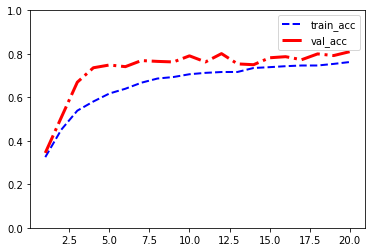

In [17]:
# 设置Y轴范围
plt.ylim(0,1)
# 训练准确率曲线
show_data1 = history.history['acc']
# 测试准确率曲线
show_data2 = history.history['val_acc']
x_data = list(range(1,len(show_data1)+1))
ln1, = plt.plot(x_data,show_data1,color='blue',linewidth=2.0,linestyle='--')
ln2, = plt.plot(x_data,show_data2,color='red',linewidth=3.0,linestyle='-.')
plt.legend(handles=[ln1,ln2],labels=['train_acc','val_acc'])
plt.show()

## 保存模型

In [18]:
# 保存模型
model_path = 'models_save/cnn_model.h5'
cnn_model.save(model_path)
print("完成模型训练，保存地址：", model_path)

完成模型训练，保存地址： models_save/cnn_model.h5


# CNN+ResNet

## 网络构建

In [19]:
import n_model as md
import tensorflow as tf
# 模型参数
model_param = {
    "a_shape": 1000,
    "b_shape": 2,
    "label_count": 4,
    "num_b":5
}

data_shape=(model_param['a_shape'],model_param['b_shape'])
# 模型实例化
model = md.CNN_ResNet_model(model_param['label_count'] , model_param['num_b'] , data_shape=data_shape)
# 使用学习率进行训练
res_model = model.model_create(learning_rate = 1e-4)
# 模型网络结构
print("实例化模型成功，网络结构如下：")
print(res_model.summary())
# 设置模型log输出地址
log_dir = os.path.join("logs/ResNet")
if not os.path.exists(log_dir):
    os.mkdir(log_dir)

实例化模型成功，网络结构如下：
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 1000, 2)]    0           []                               
                                                                                                  
 conv1d_1 (Conv1D)              (None, 998, 32)      224         ['input_2[0][0]']                
                                                                                                  
 conv1d_2 (Conv1D)              (None, 996, 64)      6208        ['conv1d_1[0][0]']               
                                                                                                  
 max_pooling1d_1 (MaxPooling1D)  (None, 62, 64)      0           ['conv1d_2[0][0]']               
                                                                            

                                                                                                  
 activation_4 (Activation)      (None, 62, 64)       0           ['add_4[0][0]']                  
                                                                                                  
 conv1d_13 (Conv1D)             (None, 60, 64)       12352       ['activation_4[0][0]']           
                                                                                                  
 global_average_pooling1d_1 (Gl  (None, 64)          0           ['conv1d_13[0][0]']              
 obalAveragePooling1D)                                                                            
                                                                                                  
 dense_2 (Dense)                (None, 256)          16640       ['global_average_pooling1d_1[0][0
                                                                 ]']                              
          

## 模型训练

In [20]:
# 模型训练
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
history = res_model.fit(train_data, train_label,epochs=20, batch_size=32, validation_split=0.2,callbacks=[tensorboard_callback])

Epoch 1/20
98/98 [==============================] - 7s 40ms/step - loss: 0.7433 - acc: 0.7014 - val_loss: 1.6554 - val_acc: 0.2666
Epoch 2/20
98/98 [==============================] - 3s 35ms/step - loss: 0.1312 - acc: 0.9687 - val_loss: 3.5710 - val_acc: 0.2666
Epoch 3/20
98/98 [==============================] - 3s 35ms/step - loss: 0.0453 - acc: 0.9888 - val_loss: 4.4227 - val_acc: 0.2666
Epoch 4/20
98/98 [==============================] - 3s 34ms/step - loss: 0.0397 - acc: 0.9879 - val_loss: 4.3807 - val_acc: 0.2666
Epoch 5/20
98/98 [==============================] - 3s 35ms/step - loss: 0.0136 - acc: 0.9968 - val_loss: 2.5189 - val_acc: 0.2704
Epoch 6/20
98/98 [==============================] - 3s 35ms/step - loss: 0.0088 - acc: 0.9987 - val_loss: 0.7065 - val_acc: 0.8099
Epoch 7/20
98/98 [==============================] - 3s 34ms/step - loss: 0.0178 - acc: 0.9952 - val_loss: 0.0255 - val_acc: 0.9987
Epoch 8/20
98/98 [==============================] - 4s 36ms/step - loss: 0.0094 - a

KeyboardInterrupt: 

## 测试集得分

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score,classification_report,accuracy_score,log_loss
print("*****完成预处理，进行模型评估*****")
y_pred = res_model.predict(val_data)
y_pred = [np.argmax(x) for x in y_pred]
print('------------------测试集上得分：------------------------')
print('*' * 5)
print('测试集准确率得分:', round(accuracy_score(val_label, y_pred),3))
print('*' * 5)
print('准确率、召回率、f1-值测试报告如下:\n', classification_report(val_label, y_pred))

## 模型迭代准确率

In [ ]:
# 设置Y轴范围
plt.ylim(0,1)
# 训练准确率曲线
show_data1 = history.history['acc']
# 测试准确率曲线
show_data2 = history.history['val_acc']
x_data = list(range(1,len(show_data1)+1))
ln1, = plt.plot(x_data,show_data1,color='blue',linewidth=2.0,linestyle='--')
ln2, = plt.plot(x_data,show_data2,color='red',linewidth=3.0,linestyle='-.')
plt.legend(handles=[ln1,ln2],labels=['train_acc','val_acc'])
plt.show()

## 保存模型

In [ ]:
# 保存模型
model_path = 'models_save/cnn_resnet_model.h5'
res_model.save(model_path)
print("完成模型训练，保存地址：", model_path)

# 最终三个模型准确率结果得分如下：

## 随机森林-准确率得分：0.727

## CNN-准确率得分：0.833

## CNN+ResNet-准确率得分：0.989